In [161]:

## ex11

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
import numpy as np
from numpy import genfromtxt
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y = np.random.normal(0,1,(1000, 5))

U = np.genfromtxt('U.csv', delimiter=',', skip_header=1) 

Psi = np.genfromtxt('Psi.csv', skip_header=1)
Psi = np.diag(Psi)


In [162]:
# Perform factor analysis on the factor loading matrix U

fa = FactorAnalysis(n_components=5, random_state=101)
factors = fa.fit(U).components_

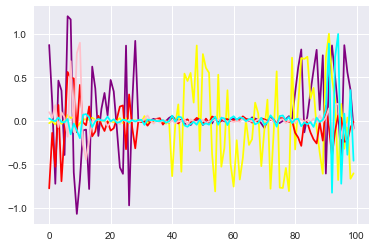

In [167]:
# Plot the extracted factors

plt.plot(factors[0][:100], "purple")
plt.plot(factors[1][:100], "yellow")
plt.plot(factors[2][:100], "red")
plt.plot(factors[3][:100], "Pink")
plt.plot(factors[4][:100], "cyan")

In [171]:
# x = Uy + e 
# Perform factor analysis on x and plot the extracted factors + the Bonus part (where we vary the level of noise)

def plotFactors_x(noise):
    e = np.random.multivariate_normal([0]*100,Psi,1000)
    e *= noise
    x = np.dot(y,U.T) + e
    fa = FactorAnalysis(n_components=5, random_state=101)
    factors = fa.fit(x).components_
    
    plt.plot(factors[0][:100], "purple")
    plt.plot(factors[1][:100], "yellow")
    plt.plot(factors[2][:100], "red")
    plt.plot(factors[3][:100], "Pink")
    plt.plot(factors[4][:100], "cyan")

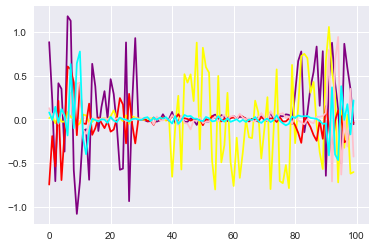

In [177]:
plotFactors_x(1)

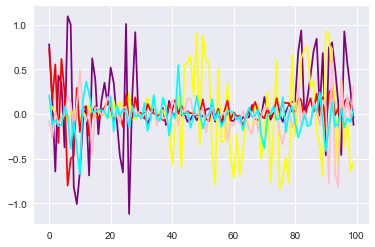

In [179]:
plotFactors_x(3)

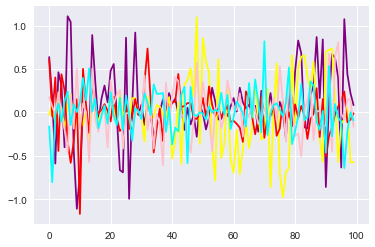

In [172]:
plotFactors_x(5)

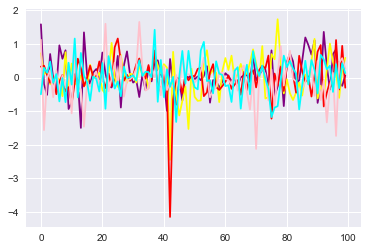

In [173]:
plotFactors_x(10)

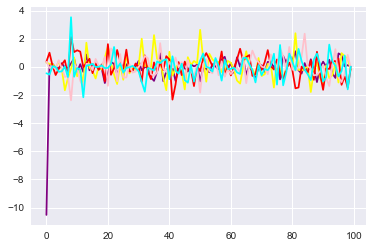

In [174]:
plotFactors_x(15)

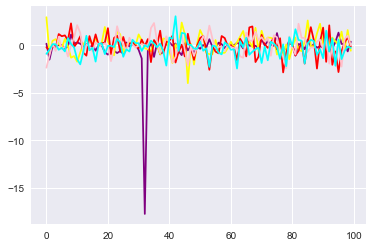

In [180]:
plotFactors_x(20)

#### The generated matrix differ quite significantly from the original matrix U when the noise level is high (10, 15, 20). However, the low level of noise dosn't affect much (1, 3, 5). 

The original factor loading matrix can not be recovered. First of all, the columns of
the fa-loading matrix is shuffled compared to the original U matrix. In some cases the
values were quite similar but in general the reconstructed loading factors were
completely different to the original factors.